# Train Yolov5

In [1]:
import os
import glob as glob
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

In [2]:
# Define some parameters
TRAIN = True
EPOCHS = 1
BATCH_SIZE = 32
class_names = ['smoke','fire']
colors = np.random.uniform(0, 255, size=(len(class_names), 3))

In [3]:
# Clone YOLOV5 Repository
if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5.git

In [4]:
%cd yolov5/
# Helper function to logging results
def set_res_dir():
    # Directory to store results
    res_dir_count = len(glob.glob('runs/train/*'))
    print(f"Current number of result directories: {res_dir_count}")
    if TRAIN:
        RES_DIR = f"results_{res_dir_count+1}"
        print(RES_DIR)
    else:
        RES_DIR = f"results_{res_dir_count}"
    return RES_DIR

/home/martin/Projects/ongoing/ukw/ukw/wildfire-detector/notebooks/yolov5


/home/martin/Projects/ongoing/ukw/ukw/wildfire-detector/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
# Train model
RES_DIR = set_res_dir()

if TRAIN:
    !python train.py --data /home/martin/Projects/ongoing/ukw/ukw/wildfire-detector/notebooks/datasets/wildfire/data.yaml --weights yolov5s.pt \
    --img 640 --epochs {EPOCHS} --batch-size {BATCH_SIZE} --name {RES_DIR}

2024-05-08 12:12:13.918422: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 12:12:13.918531: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 12:12:13.920734: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/home/martin/Projects/ongoing/ukw/ukw/wildfire-detector/notebooks/datasets/wildfire/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=

In [ ]:
# Function to show validation predictions saved during training.
def show_valid_results(RES_DIR):
    !ls runs/train/{RES_DIR}
    EXP_PATH = f"runs/train/{RES_DIR}"
    validation_pred_images = glob.glob(f"{EXP_PATH}/*_pred.jpg")
    print(validation_pred_images)
    for pred_image in validation_pred_images:
        image = cv2.imread(pred_image)
        plt.figure(figsize=(19, 16))
        plt.imshow(image[:, :, ::-1])
        plt.axis('off')
        plt.show()

confusion_matrix.png				       results.csv
events.out.tfevents.1715191938.martineserios.329273.0  results.png
hyp.yaml					       train_batch0.jpg
labels_correlogram.jpg				       val_batch0_labels.jpg
labels.jpg					       val_batch0_pred.jpg
opt.yaml					       weights


['runs/train/results_2/val_batch0_pred.jpg']


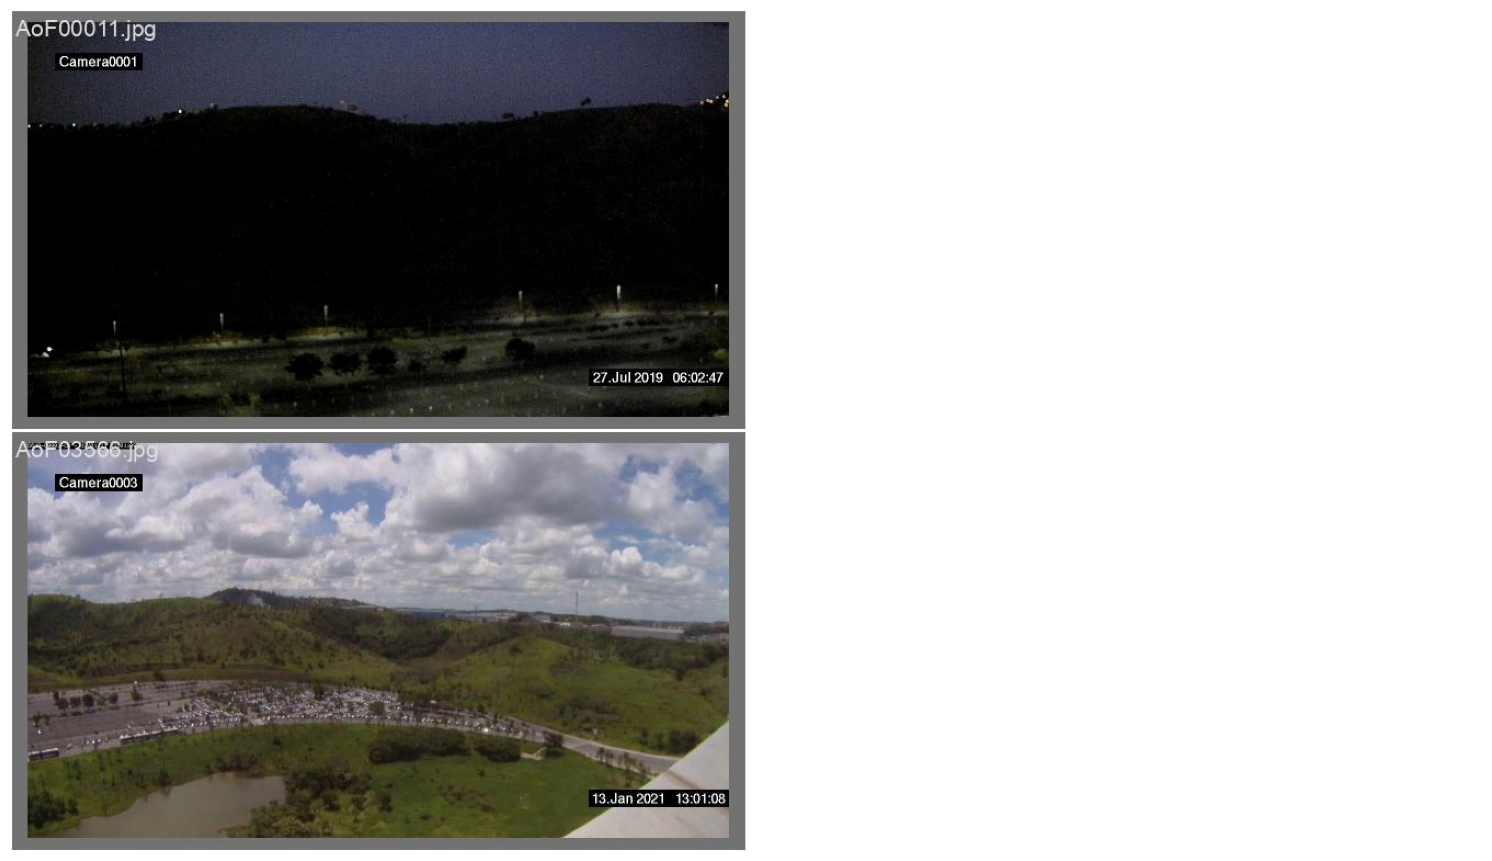

In [ ]:
show_valid_results(RES_DIR)